In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../..')
from funcs.stats import get_stats
from funcs.xarray_tools import find_cor_ts
from funcs.plotting import map_grid_clean
from constants.colors import loc_colors

from taus import decorrelation_temporal_model

In [53]:
# fps = list(Path('/Users/rdcrlzh1/Documents/uavsar-coherence/uavsar').glob('*_tau.nc'))
fps = list(Path('/bsuhome/zacharykeskinen/scratch/coherence/uavsar').glob('*_tau.nc'))
dss = {fp.stem.replace('_v3_tau',''): xr.open_dataset(fp) for fp in fps}
df = pd.read_csv(Path('/bsuhome/zacharykeskinen/uavsar-coherence/data/snotel').joinpath('snotel_uavsar_diffs_v2.csv'))
df = df[df['pol'] == 'VV']
df['swe_diff_daynorm'] = df.swe_diff / df.days

fig_dir = Path('/Users/rdcrlzh1/Documents/uavsar-coherence/snow/')

In [5]:
# snotel_list = pd.read_csv('~/uavsar-coherence/data/snotel/snotel-list.csv', index_col=['State', 'ID'])
# snotel_list.index = snotel_list.index.set_levels(snotel_list.index.levels[1].str.replace('\t', ''), level=1)
# state_abbr = {'Colorado':'CO', 'Idaho': 'ID', 'California':'CA', 'New Mexico': 'NM', 'Utah': 'UT', 'Montana': 'MT'}
# state_abbr = {v: k for k, v in state_abbr.items()}

# for snotel_id in df.snotel.unique():
#     for heading in df[df.snotel == snotel_id].heading.unique():
#         sid, state, network = snotel_id.split(':')
#         snotel_meta = snotel_list.loc[(state_abbr[state], sid)]
#         lat, long = snotel_meta['Latitude'], snotel_meta['Longitude']
#         g_inf, tau = dss[f"{df[df.snotel == snotel_id]['site'].iloc[0]}_v3_tau"].sel(x = long, y = lat, method = 'nearest')['curvefit_coefficients'].sel(heading = heading).values
#         print(g_inf)
#         print(tau)
#         # df[df.snotel == snotel_id].plot.scatter(x = 'days', y = 'cor')
#         fig, ax = plt.subplots()
#         sns.scatterplot(data = df[df.snotel == snotel_id], x = 'days', y = 'cor', hue = 'swe_diff_bins', ax = ax)
#         plt.xlim(left = 0)
#         xs = np.arange(300)
#         ax.plot(xs, decorrelation_temporal_model(xs, g_inf, tau))
#         plt.show()

In [ ]:
out_dir = Path('/bsuhome/zacharykeskinen/scratch/coherence/model')
res = np.fromfile(out_dir.joinpath('model_cors_dswes_cummelts_swes.npy'))

# from itertools import product
# from tqdm import tqdm
# cors = np.array([])
# dswes = np.array([])
# cummelts = np.array([])
# swes = np.array([])
# for stem, ds in dss.items():

#     ts = find_cor_ts(ds)
#     name = loc_colors[stem]['name']
#     print(name)

#     ds = ds.where((ds['tree_perc'] < 10) & (ds["inc"] < np.deg2rad(60))& (ds["inc"] > np.deg2rad(30)))

#     for heading, t1, t2 in tqdm(ts):
#         t1, t2 = pd.to_datetime(t1), pd.to_datetime(t2)
#         # if (t2 - t1).days > 13: continue
#         cor = ds['cor'].sel(time1 = t1, time2 = t2, heading = heading, pol = 'VV').values.ravel()
#         model = ds[['model_sd', 'model_melt', 'model_swe']].sel(model_time = slice(t1, t2), heading = heading)

#         d_swe = (model['model_swe'].isel(model_time = -1) - model['model_swe'].isel(model_time = 0)).values.ravel()  / (t2 - t1).days
#         cum_melt = model['model_melt'].sum('model_time').values.ravel() / (t2 - t1).days
#         swe = model['model_swe'].isel(model_time = -1).values.ravel()

#         idx = (~np.isnan(cor)) & (~np.isnan(d_swe)) & (~np.isnan(cum_melt)) & (~np.isnan(swe))
#         ncor, d_swe, cum_melt, swe = cor[idx], d_swe[idx], cum_melt[idx], swe[idx]
#         cors = np.concatenate([cors, ncor])
#         dswes = np.concatenate([dswes, d_swe])
#         cummelts = np.concatenate([cummelts, cum_melt])
#         swes = np.concatenate([swes, swe])
# np.vstack([cors, dswes, cummelts, swes]).tofile(out_dir.joinpath('model_cors_dswes_cummelts_swes.npy'))

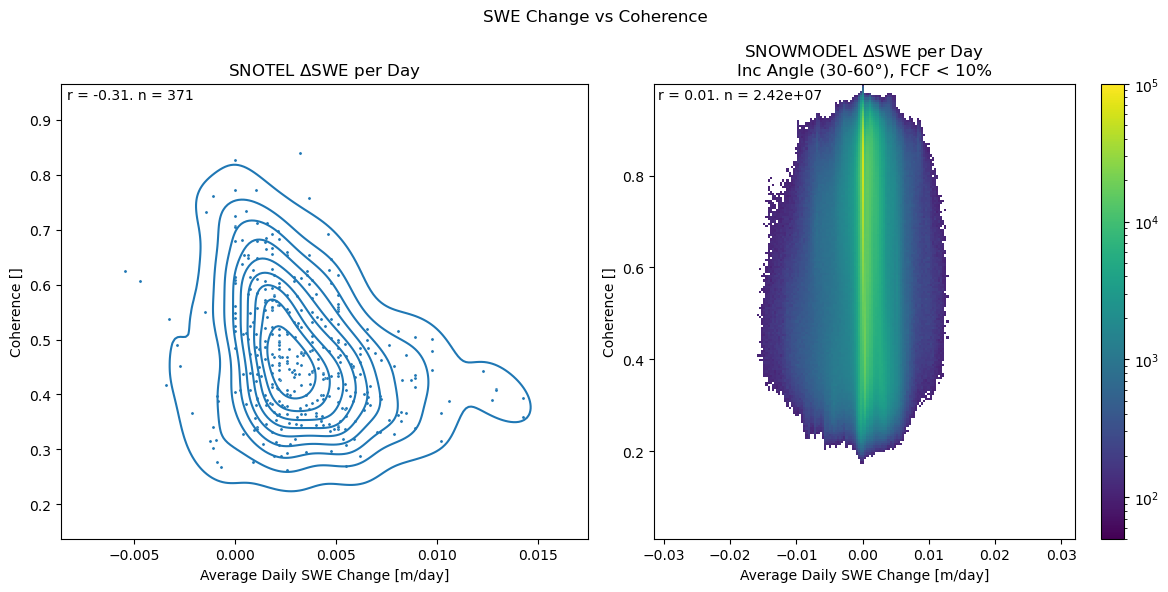

In [150]:
fig, axes= plt.subplots(1,2 , figsize = (12, 6))
# gs = axes[0, 1].get_gridspec()
# for ax in axes[1, :]: ax.remove()
# axbig = fig.add_subplot(gs[1, :])

data = df[df.days > 4].copy()#.loc[df.snotel.isin((df[df.days < 8].value_counts('snotel') > 20).index)]

ax = axes[0]
data['dt_bins'] = pd.cut(data['days'], bins = [5, 10, 15, 300])
# sns.kdeplot(x = 'swe_diff_daynorm', y = 'cor', data = df[(df.days > 7) & (df.days < 14)], ax= ax, fill=True, thresh = 0.01)
# sns.kdeplot(x = 'swe_diff_daynorm', y = 'cor', data = df[df.days < 7], ax= ax, fill=True, thresh = 0.01)
sns.kdeplot(x = 'swe_diff_daynorm', y = 'cor', data = df, ax = ax, fill= False)
sns.scatterplot(x = 'swe_diff_daynorm', y = 'cor', data = df, ax= ax, s = 5)
# import matplotlib.patches as  mpatches
# handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="<7 days"),
        #    mpatches.Patch(facecolor=plt.cm.Blues(100), label="7-14 days")]
# ax.legend(handles=handles)
rmse, r, n = get_stats(df.swe_diff_daynorm, df.cor)
add_text(f'r = {r:.2f}. n = {n:.0f}', ax, 'upper left')
ax.set_title('SNOTEL $\\Delta$SWE per Day')

ax = axes[1]
h = ax.hist2d(dswes, cors, bins = 200, norm=mpl.colors.LogNorm(vmin = 50, vmax = 100000), cmin = 100)
fig.colorbar(h[3], ax = ax)
rmse, r, n = get_stats(dswes, cors)
add_text(f'r = {r:.2f}. n = {n:.2e}', ax, 'upper left')
ax.set_title('SNOWMODEL $\\Delta$SWE per Day\nInc Angle (30-60°), FCF < 10%')

for ax in axes:
        ax.set_xlabel('Average Daily SWE Change [m/day]')
        ax.set_ylabel('Coherence []')

plt.suptitle('SWE Change vs Coherence')
plt.tight_layout()
fig_dir = Path('/bsuhome/zacharykeskinen/uavsar-coherence/figures/snow')
plt.savefig(fig_dir.joinpath('SWE_change_cor.png'))